**Purpose**: Analyze the Google Analytics stats of Galaxy Training Material website

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

import datetime
from dateutil import relativedelta

Usage: on Google Analytics

1. Export Audience (Audience - Overview)  from Nov 1, 2018 to today for all pages to csv in `data/audience_statistics.csv`
2. Export Page statistics (Behaviour - Site Content - All pages) from Nov 1, 2018 to today for all pages to csv in `data/page_statistics.csv`

In [2]:
start = datetime.datetime(year=2018, month=11, day=1)
end = datetime.datetime.now()
str(end)

'2019-12-04 10:46:40.324047'

In [3]:
r = relativedelta.relativedelta(end, start)
month_nb = 12*r.years + r.months
month_nb

13

# General statistics

In [4]:
df = (pd.read_csv('../data/audience_statistics.csv', header=5)
     .dropna())
# format columns
df["Month Index"] = df["Month Index"].astype(int)
df["Users"] = df["Users"].str.replace(',', '').astype(int)
# add column with date
df["Month"] = [start + relativedelta.relativedelta(months=i) for i in df["Month Index"]]
# put month as index
df = (df
      .set_index('Month')
      .drop(["Month Index"], axis=1))

In [5]:
df

,Users
Month,
2018-11-01,6175
2018-12-01,5933
2019-01-01,6507
2019-02-01,7402
2019-03-01,9850
2019-04-01,10985
2019-05-01,12012
2019-06-01,10115
2019-07-01,11101


In [6]:
df.Users.mean()

10252.642857142857

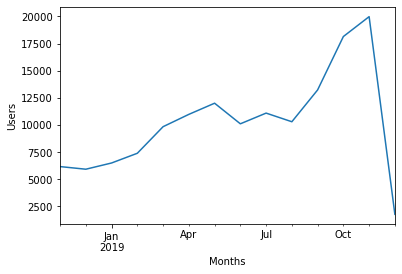

In [7]:
plt.figure()
df.Users.plot()
plt.xlabel('Months')
plt.ylabel('Users')
plt.show()

# Page statistics

In [8]:
df = (pd.read_csv('../data/page_statistics.csv', header=5, skipfooter=1)
     .dropna()
     .drop(['Page Value'], axis=1))
# keep only lines for tutorials
df = df[df.Page.str.contains('tutorials')]
df = df[~df.Page.str.contains('translate')]
# extract topics and tutorial
new = df.Page.str.split('/', expand = True)
df["Tutorial"] = new[5]
df["Topic"] = new[3]
df = (df.drop(columns =["Page"]))
# add page view per month
df.Pageviews = df.Pageviews.str.replace(',', '').astype(int)
df["Pageviews / month"] = round(df.Pageviews / month_nb)
# format columns
df["Unique Pageviews"] = df["Unique Pageviews"].str.replace(',', '').astype(int)
df["Entrances"] = df["Entrances"].str.replace(',', '').astype(int)
# order columns
df = df.reindex(columns=[
    'Tutorial', 'Topic', 'Pageviews / month', 'Pageviews', 'Unique Pageviews', 'Avg. Time on Page', 'Entrances', 'Bounce Rate', '% Exit'])
df

/Users/bebatut/miniconda3/envs/galaxy-training-material-stats/lib/python3.6/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


,Tutorial,Topic,Pageviews / month,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit
2,ref-based,transcriptomics,1763.0,22920,18983,00:04:59,15670,78.70%,71.61%
3,mothur-miseq-sop,metagenomics,1418.0,18435,15292,00:05:09,13245,79.65%,73.87%
4,rna-seq-viz-with-volcanoplot,transcriptomics,1299.0,16890,14534,00:04:19,13817,83.67%,78.50%
5,quality-control,sequence-analysis,1170.0,15213,12893,00:04:42,9549,80.27%,68.20%
8,galaxy-intro-101,introduction,768.0,9982,8631,00:03:29,7140,77.76%,68.74%
...,...,...,...,...,...,...,...,...,...
1864,somatic-variants,variant-analysis,0.0,1,1,00:00:08,0,0.00%,0.00%
1865,somatic-variants,variant-analysis,0.0,1,1,00:00:11,1,0.00%,0.00%
1871,tutorial.html,tutorials,0.0,1,1,00:00:41,0,0.00%,0.00%
1872,tutorials,sharedics,0.0,1,1,00:00:00,0,0.00%,100.00%


In [9]:
df[['Tutorial', 'Topic', 'Pageviews / month']].head(10)

,Tutorial,Topic,Pageviews / month
2,ref-based,transcriptomics,1763.0
3,mothur-miseq-sop,metagenomics,1418.0
4,rna-seq-viz-with-volcanoplot,transcriptomics,1299.0
5,quality-control,sequence-analysis,1170.0
8,galaxy-intro-101,introduction,768.0
9,mapping,sequence-analysis,701.0
11,rna-seq-viz-with-heatmap2,transcriptomics,686.0
14,genome-annotation,genome-annotation,585.0
15,rna-seq-reads-to-counts,transcriptomics,575.0
18,general-tutorial,metagenomics,500.0
